In [220]:
import os
import pandas as pd

# Change the current working directory
os.chdir('/Users/roymayo593/Desktop/MSc Project/Data')

# Define paths to the training data and targets files
training_data_path = 'dengue_features_train.csv'
training_targets_path = 'dengue_labels_train.csv'

# Read in the data and targets files
df = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

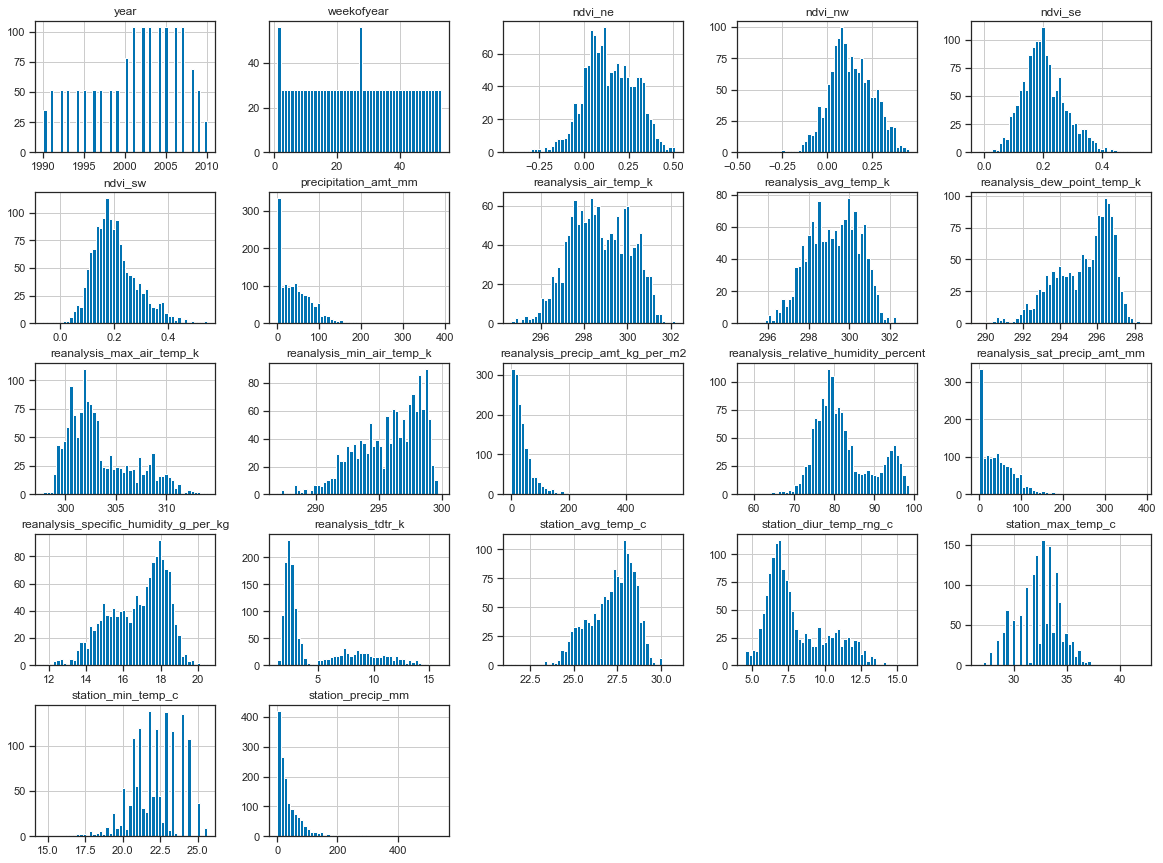

In [221]:
df.info()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50,figsize=(20,15))
#Merging of both DataFrames
merged_df = pd.concat([df, targets], axis=1)
merged_df
# Compute the correlations
correlations = merged_df.corr()['total_cases'].drop('total_cases')
sorted_correlations = correlations.abs().sort_values(ascending=False)
print(sorted_correlations.head(5))



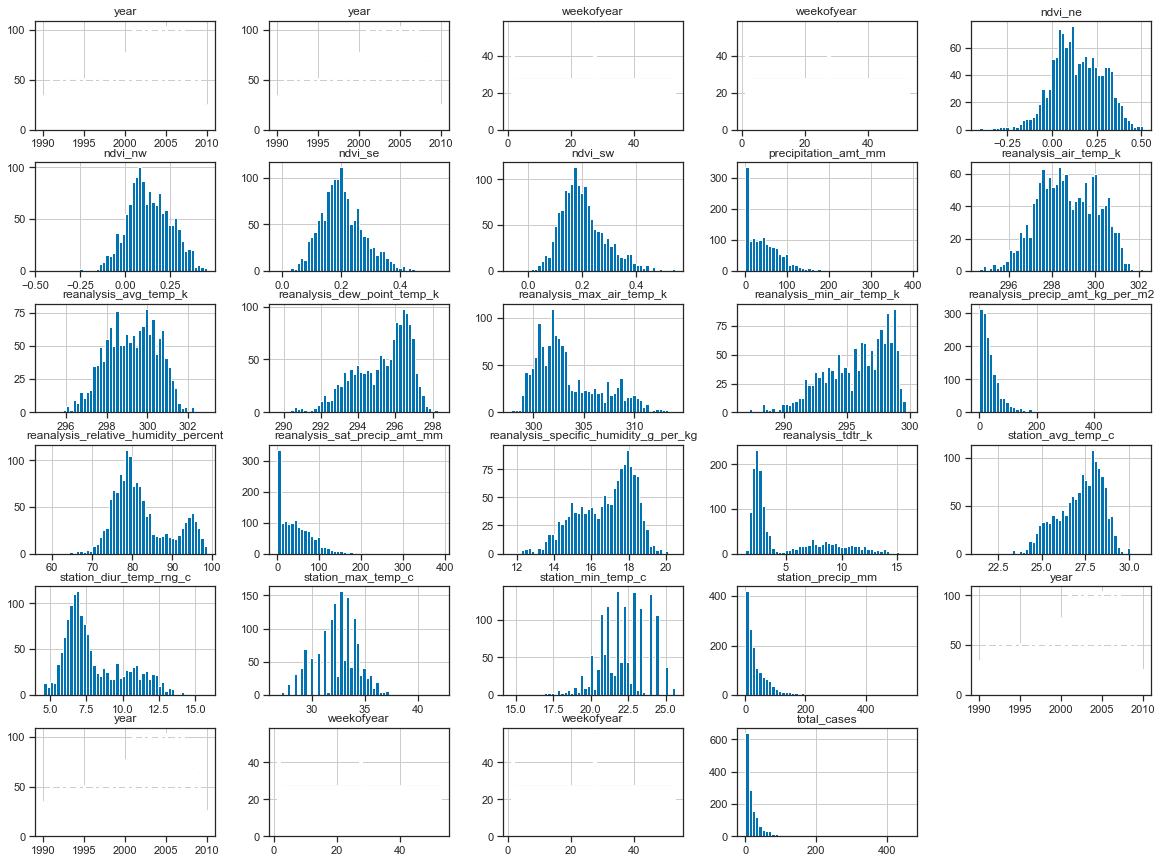

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering numeric columns
numeric_columns = merged_df.select_dtypes(include=[float, int]).columns

# Generate histogram for numeric columns
merged_df[numeric_columns].hist(bins=50, figsize=(20, 15))
plt.show()


In [223]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge


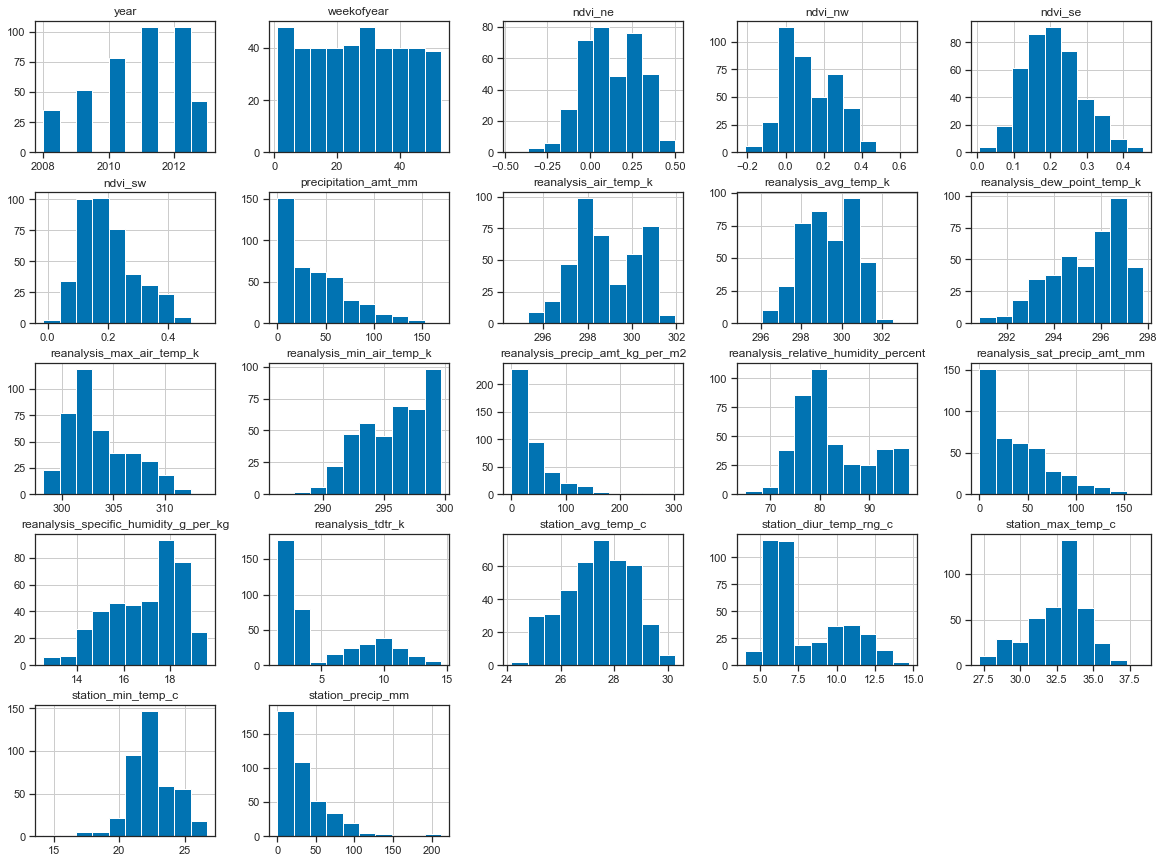

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/Users/roymayo593/Desktop/MSc Project/Data')

data_features_path = 'dengue_features_test.csv'
data_targets_path = 'dengue_labels_train.csv' 

dengue_spread_predictors = pd.read_csv(data_features_path, encoding="ISO-8859-1")
dengue_spread_targets = pd.read_csv(data_targets_path, encoding="ISO-8859-1")

dengue_spread_predictors.hist(figsize=(20, 15))
plt.show()

In [226]:
import re
import time
import datetime 
import operator
import numpy as np
import pandas as pd 
import collections
import unicodedata
import collections
import seaborn as sns
import collections
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from datetime import datetime, date, timedelta
from IPython.display import Image
%matplotlib inline

In [227]:
#Data reading
#Load train and test csv file
dengue_features_train = pd.read_csv(training_data_path)
dengue_features_test = pd.read_csv(training_targets_path)
dengue_labels_train = pd.read_csv('dengue_labels_train.csv')


In [228]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [229]:
dengue_features_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [230]:
dengue_features_train.describe(include = ['object'])

,city,week_start_date
count,1456,1456
unique,2,1049
top,sj,2005-06-18
freq,936,2


In [231]:
dengue_features_test.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [232]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [233]:
#Merging the Train dataframe with the labels data frame 

dengue_train = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

In [234]:
dengue_train.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.09)

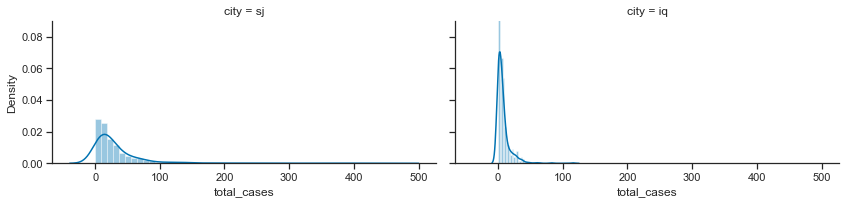

In [235]:
#checking the total cases of Dengue in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_features_test, col="city",aspect=2)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090) 

/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


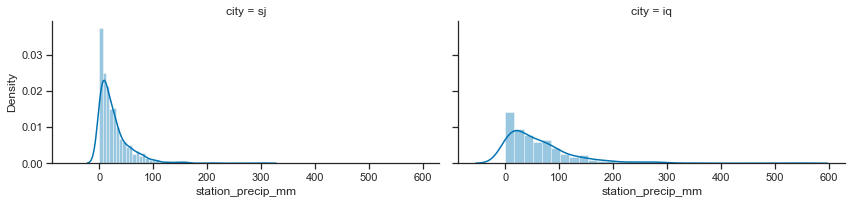

In [236]:
#Lets check the station_precip_mm in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_precip_mm") 


/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


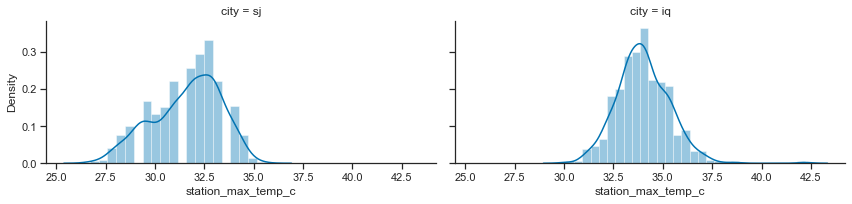

In [237]:
#Lets check the station_max_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_max_temp_c") 

/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


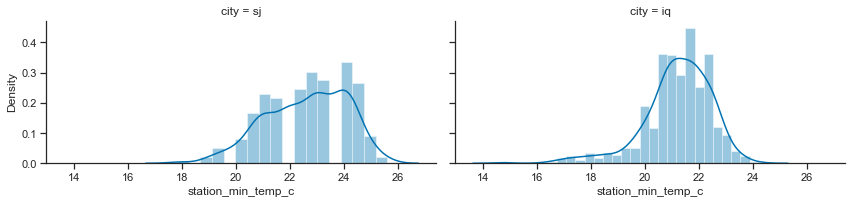

In [238]:
#Lets check the station_min_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_min_temp_c") 

/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


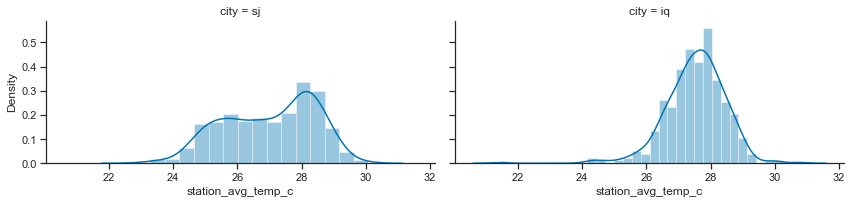

In [239]:
#Lets check the station_avg_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_avg_temp_c")

In [240]:
#Above plot shows that Iquitos is generally a littlbe bit hotter than San Juan,and the precipitation is much higher.
#Which might one of the reason for more in total cases of dengue is more in Iquitos

In [241]:
dengue_train.groupby('city').mean().total_cases

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [242]:
#San Juan has a lot more dengue cases than Iquitos

#checking the evolution of dengue disease throughout the year

/Users/roymayo593/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Evolution of dengue disease throughout the year')

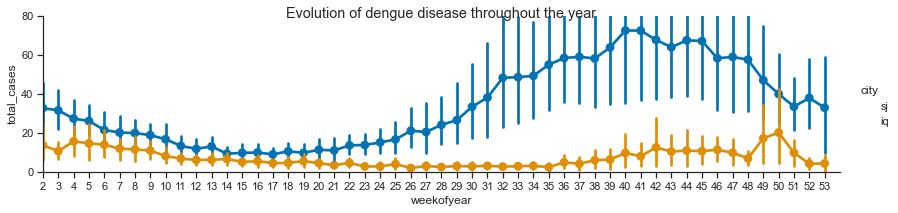

In [243]:
sns.set(style="ticks", palette="colorblind")
fig = sns.FacetGrid(dengue_train, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = dengue_train.weekofyear.max()
min_x = dengue_train.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 80))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease throughout the year")

In [244]:
#In San Juan, one clear trend is that the dengue virus becomes a lot more active at the other half of the year,
#starting from July (week 28).
#In Iquitos, the disease develop much slower, with its peak at the very end of the year (week 50).

In [245]:
#Finding the number of NUll or NaN values in the dataframe
dengue_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

In [246]:
dengue_features_test.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [247]:
dengue_train.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [248]:
#This dataset has two cities in it: San Juan, Puerto Rico (sj) and Iquitos, Peru (iq). 
#Since we hypothesize that the spread of dengue may follow different patterns between the two,
#we will divide the dataset, train seperate models for each city, and then join our predictions

In [249]:
dengue_train_sj = dengue_train[dengue_train.city == 'sj'].copy()
dengue_train_iq = dengue_train[dengue_train.city == 'iq'].copy()


dengue_test_sj = dengue_features_test[dengue_features_test.city == 'sj'].copy()
dengue_test_iq = dengue_features_test[dengue_features_test.city == 'iq'].copy()

In [250]:
dengue_train_sj.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [251]:
dengue_train_iq.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,0,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,0,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,0,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,0,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,0,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [252]:
dengue_train_sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_ma

In [253]:
dengue_train_iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
total_cases                               0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c              

In [254]:
dengue_train_sj.fillna(method='ffill', inplace=True)

In [255]:
dengue_train_iq.fillna(method='ffill', inplace=True)

In [256]:
#dengue_features_test

dengue_test_sj.fillna(method='ffill', inplace=True)
dengue_test_iq.fillna(method='ffill', inplace=True)

In [257]:
print('San Juan')
print('mean: ', dengue_train_sj.total_cases.mean())
print('var :', dengue_train_sj.total_cases.var())

print('\nIquitos')
print('mean: ', dengue_train_iq.total_cases.mean())
print('var :', dengue_train_iq.total_cases.var())

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.89552393656412


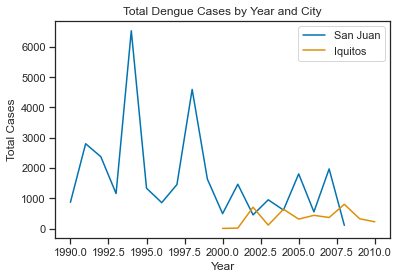

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "dengue_labels_train.csv"

df = pd.read_csv(file_path)

df_sj = df[df['city'] == 'sj']
df_iq = df[df['city'] == 'iq']

df_sj_grouped = df_sj.groupby('year')['total_cases'].sum().reset_index()
df_iq_grouped = df_iq.groupby('year')['total_cases'].sum().reset_index()

plt.plot(df_sj_grouped['year'], df_sj_grouped['total_cases'], label='San Juan')
plt.plot(df_iq_grouped['year'], df_iq_grouped['total_cases'], label='Iquitos')

plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Dengue Cases by Year and City')
plt.legend()
plt.show()


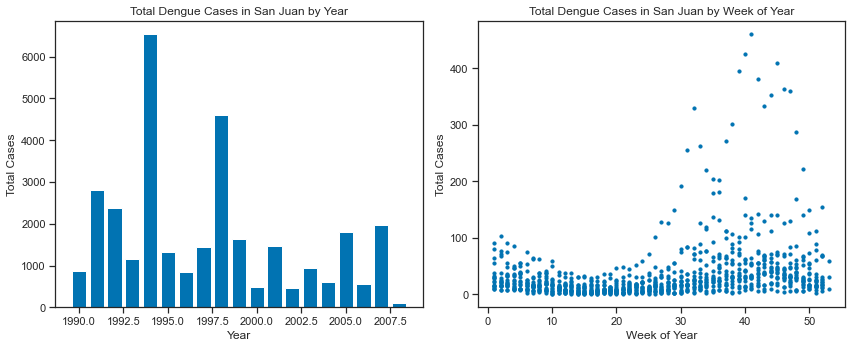

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "dengue_labels_train.csv"

df = pd.read_csv(file_path)

# Filter the dataframe for San Juan (city == 'sj')
df_sj = df[df['city'] == 'sj']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Total Cases by Year
df_year = df_sj.groupby('year')['total_cases'].sum().reset_index()
axes[0].bar(df_year['year'], df_year['total_cases'])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Cases')
axes[0].set_title('Total Dengue Cases in San Juan by Year')

# Subplot 2: Total Cases by Week of Year
axes[1].scatter(df_sj['weekofyear'], df_sj['total_cases'], s=10)
axes[1].set_xlabel('Week of Year')
axes[1].set_ylabel('Total Cases')
axes[1].set_title('Total Dengue Cases in San Juan by Week of Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


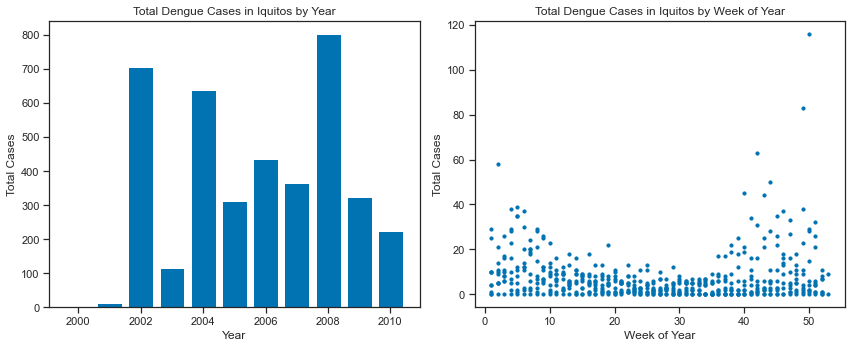

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "dengue_labels_train.csv"

df = pd.read_csv(file_path)

# Filter the dataframe for Iquitos (city == 'iq')
df_sj = df[df['city'] == 'iq']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Total Cases by Year
df_year = df_sj.groupby('year')['total_cases'].sum().reset_index()
axes[0].bar(df_year['year'], df_year['total_cases'])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Cases')
axes[0].set_title('Total Dengue Cases in Iquitos by Year')

# Subplot 2: Total Cases by Week of Year
axes[1].scatter(df_sj['weekofyear'], df_sj['total_cases'], s=10)
axes[1].set_xlabel('Week of Year')
axes[1].set_ylabel('Total Cases')
axes[1].set_title('Total Dengue Cases in Iquitos by Week of Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

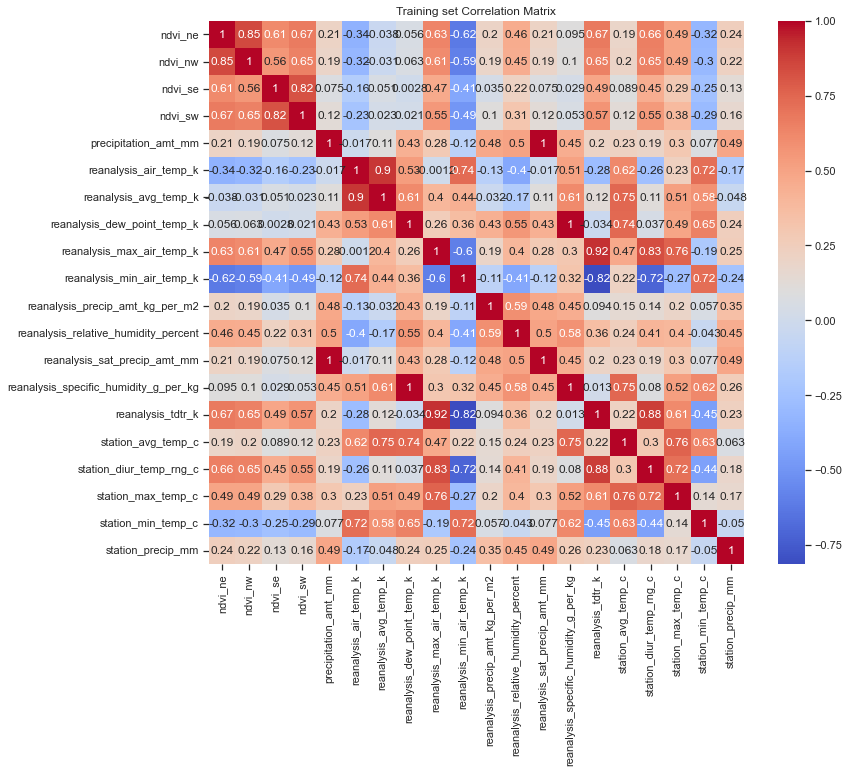

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "dengue_features_train.csv"

# Read the dataset
df = pd.read_csv(file_path)

# Select the columns of interest
columns_of_interest = ['city', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
                       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
                       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
                       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
                       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']

df_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Training set Correlation Matrix')
plt.show()

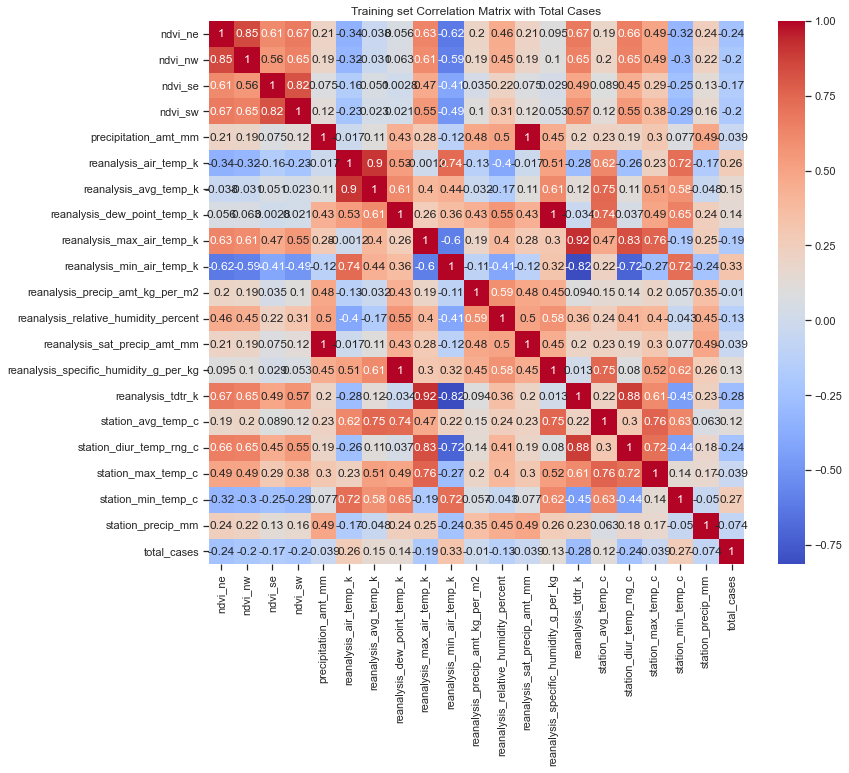

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features_file_path = "dengue_features_train.csv"
labels_file_path = "dengue_labels_train.csv"

# Read the features dataset
df_features = pd.read_csv(features_file_path)

# Read the labels dataset
df_labels = pd.read_csv(labels_file_path)

# Merge the features and labels on the common columns
df_merged = pd.merge(df_features, df_labels, on=['city', 'year', 'weekofyear'])

# Select the columns of interest
columns_of_interest = ['city', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
                       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                       'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
                       'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
                       'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c',
                       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'total_cases']

df_selected = df_merged[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Training set Correlation Matrix with Total Cases')
plt.show()

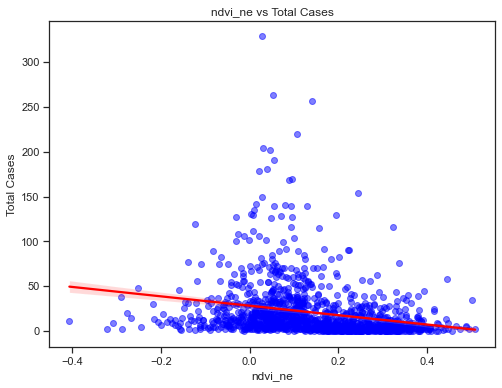

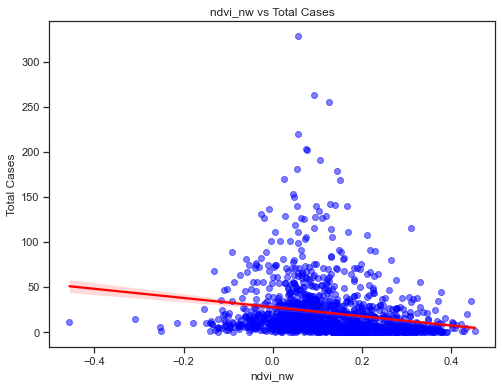

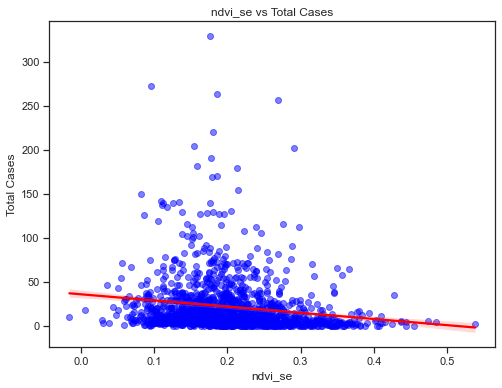

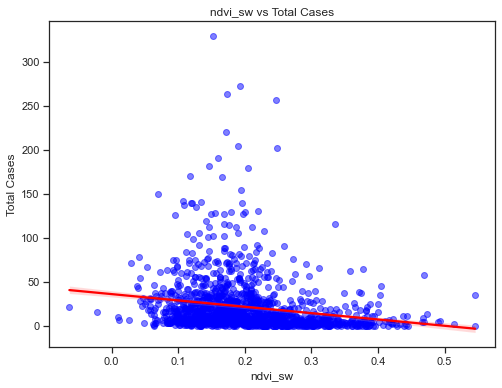

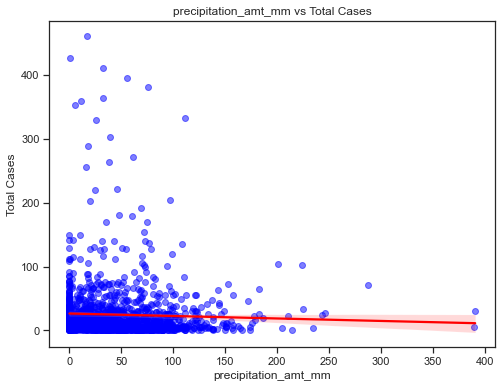

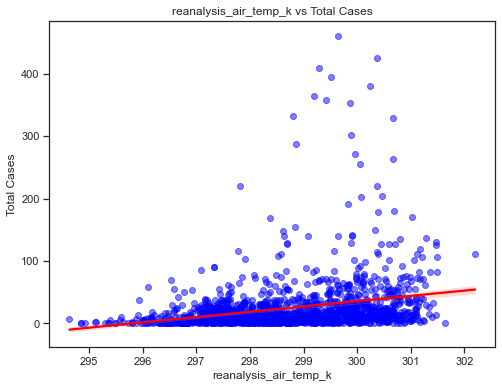

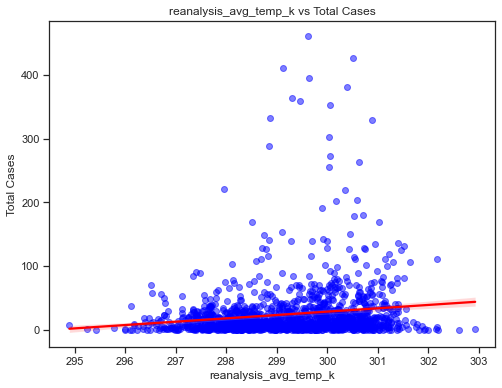

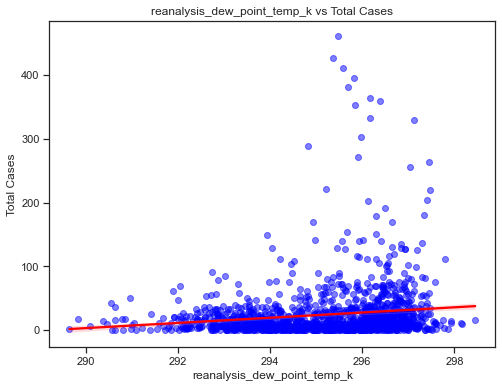

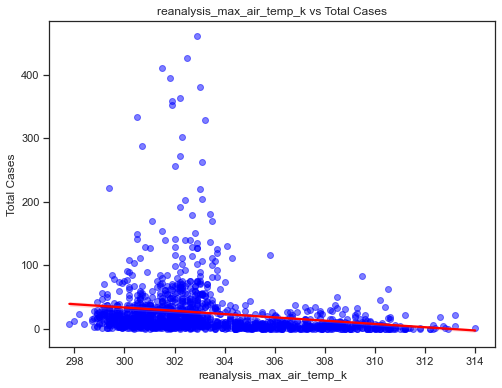

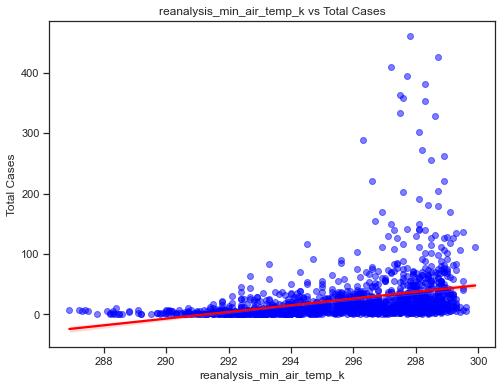

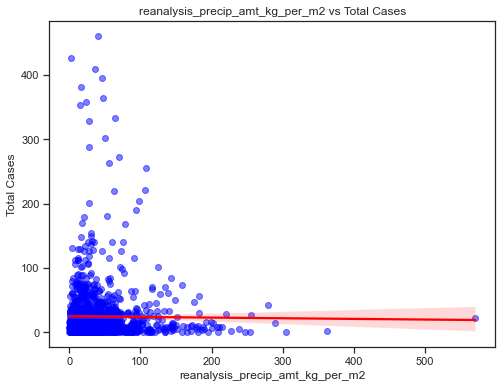

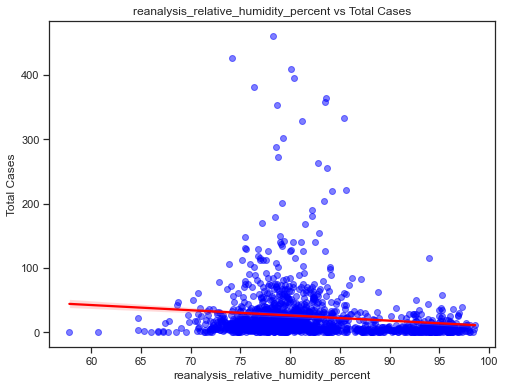

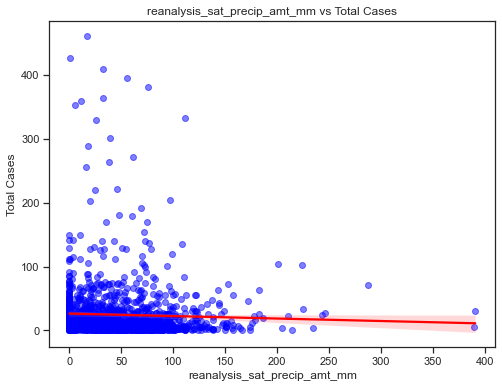

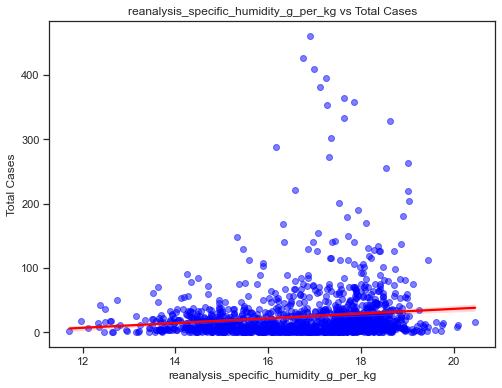

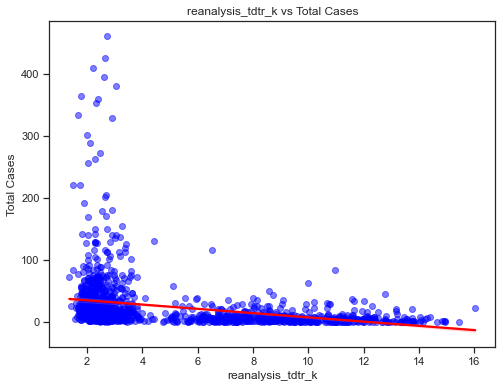

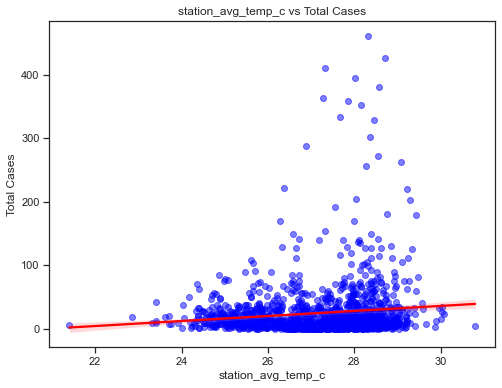

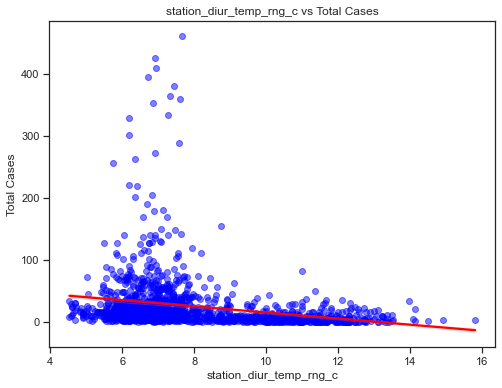

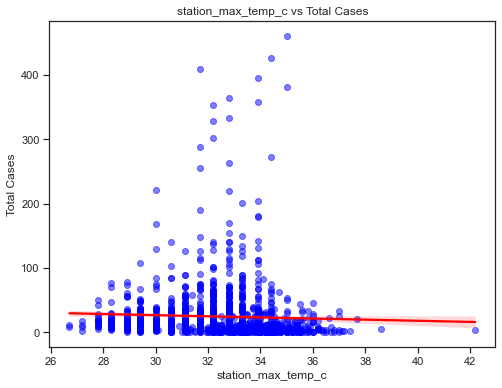

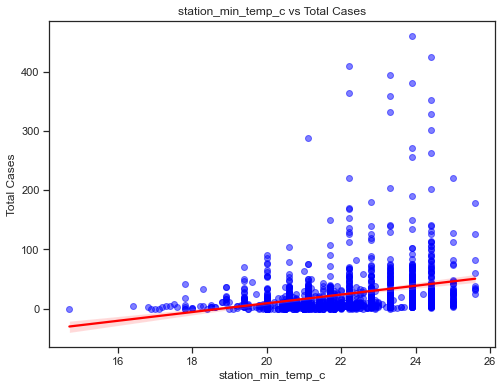

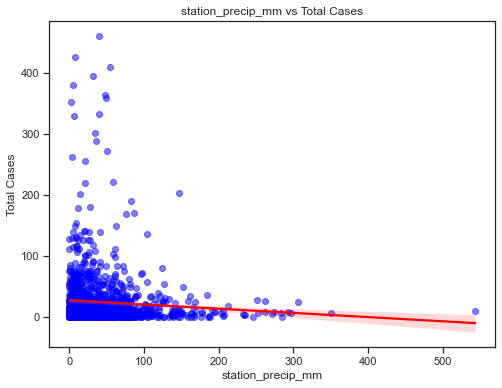

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features_file = "dengue_features_train.csv"
labels_file = "dengue_labels_train.csv"

# Read the feature dataset
df_features = pd.read_csv(features_file)

# Read the label dataset
df_labels = pd.read_csv(labels_file)

# Merge the feature and label datasets based on the common columns
df_merged = pd.merge(df_features, df_labels, on=['city', 'year', 'weekofyear'])

# Select the columns of interest
columns_of_interest = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
                       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
                       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
                       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
                       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
                       'total_cases']

# Iterate over each column and create a scatter plot with linear regression line
for column in columns_of_interest:
    if column != 'total_cases':
        plt.figure(figsize=(8, 6))
        sns.regplot(x=df_merged[column], y=df_merged['total_cases'], scatter_kws={'color': 'blue', 'alpha': 0.5},
                    line_kws={'color': 'red'})
        plt.xlabel(column)
        plt.ylabel('Total Cases')
        plt.title(f'{column} vs Total Cases')
        plt.show()



In [264]:
#Multiple Linear Regression Predictive model

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score  # Import r2_score
import pandas as pd

# Read the dataset
df = pd.read_csv('dengue_labels_train.csv')

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year']
df_selected = df[columns_of_interest]

# Split the data into San Juan (sj) and Iquitos (iq) cities
df_sj = df_selected[df_selected['city'] == 'sj']
df_iq = df_selected[df_selected['city'] == 'iq']

# Split the data into features and labels for San Juan
X_sj = df_sj[['year']]
y_sj = df_sj['total_cases']

# Split the data into features and labels for Iquitos
X_iq = df_iq[['year']]
y_iq = df_iq['total_cases']

# Split the data into training and test sets for San Juan
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X_sj, y_sj, test_size=0.2, random_state=42)

# Split the data into training and test sets for Iquitos
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X_iq, y_iq, test_size=0.2, random_state=42)

# Create and fit the linear regression models for each city
model_sj = LinearRegression()
model_sj.fit(X_sj_train, y_sj_train)

model_iq = LinearRegression()
model_iq.fit(X_iq_train, y_iq_train)

# Make predictions on the test sets for each city
y_sj_pred = model_sj.predict(X_sj_test)
y_iq_pred = model_iq.predict(X_iq_test)

# Calculate mean absolute error for each city
mae_sj = mean_absolute_error(y_sj_test, y_sj_pred)
mae_iq = mean_absolute_error(y_iq_test, y_iq_pred)

# Calculate R-squared for each city
r2_sj = r2_score(y_sj_test, y_sj_pred)
r2_iq = r2_score(y_iq_test, y_iq_pred)

print("Mean Absolute Error (San Juan):", mae_sj)
print("Mean Absolute Error (Iquitos):", mae_iq)
print("R-squared (San Juan):", r2_sj)
print("R-squared (Iquitos):", r2_iq)


Mean Absolute Error (San Juan): 27.7363015276809
Mean Absolute Error (Iquitos): 5.862783768886453
R-squared (San Juan): 0.0612650155554868
R-squared (Iquitos): 0.06439233205110584


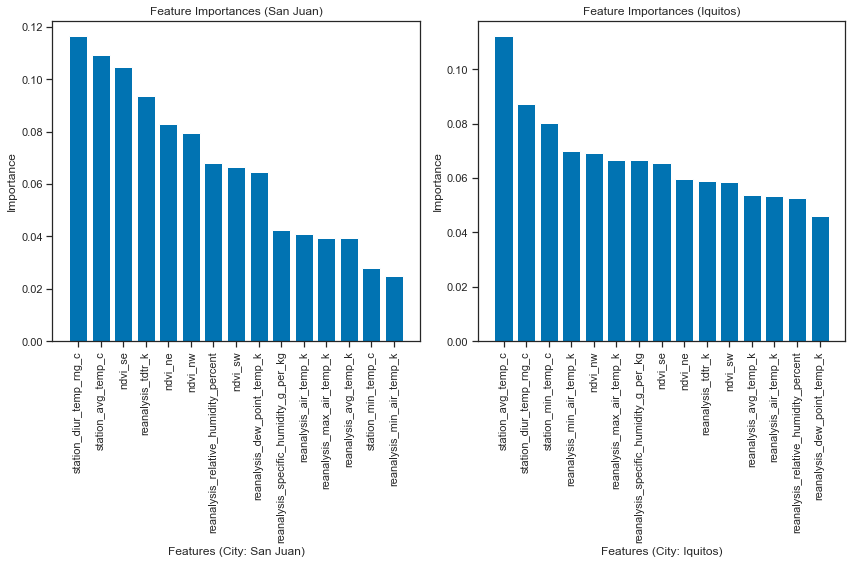

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Read the dataset
df_labels = pd.read_csv('dengue_labels_train.csv')
df_features = pd.read_csv('dengue_features_train.csv')

# Merge the two dataframes based on 'city' and 'year'
df_merged = pd.merge(df_features, df_labels, on=['city', 'year'])

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
                       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 
                       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 
                       'station_diur_temp_rng_c', 'station_min_temp_c']
df_selected = df_merged[columns_of_interest]

# Split the data into San Juan (sj) and Iquitos (iq)
df_sj = df_selected[df_selected['city'] == 'sj']
df_iq = df_selected[df_selected['city'] == 'iq']

# Encode the categorical variable 'city' using one-hot encoding
df_sj_encoded = pd.get_dummies(df_sj, columns=['city'])
df_iq_encoded = pd.get_dummies(df_iq, columns=['city'])

# Split the data into features and labels for San Juan (sj)
X_sj = df_sj_encoded.drop(['total_cases', 'city_sj'], axis=1)
y_sj = df_sj_encoded['total_cases']

# Split the data into features and labels for Iquitos (iq)
X_iq = df_iq_encoded.drop(['total_cases', 'city_iq'], axis=1)
y_iq = df_iq_encoded['total_cases']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_sj_imputed = imputer.fit_transform(X_sj)
X_iq_imputed = imputer.fit_transform(X_iq)

# Create and fit the Random Forest Regression models for each city
model_sj = RandomForestRegressor()
model_sj.fit(X_sj_imputed, y_sj)

model_iq = RandomForestRegressor()
model_iq.fit(X_iq_imputed, y_iq)

# Calculate feature importances for each city
importances_sj = model_sj.feature_importances_
importances_iq = model_iq.feature_importances_

# Sort feature importances in descending order for each city
indices_sj = np.argsort(importances_sj)[::-1]
indices_iq = np.argsort(importances_iq)[::-1]

# Rearrange feature names based on feature importances for each city
feature_names_sj = X_sj.columns[indices_sj]
feature_names_iq = X_iq.columns[indices_iq]

# Plot feature importances for each city
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.bar(range(X_sj_imputed.shape[1]), importances_sj[indices_sj])
plt.xticks(range(X_sj_imputed.shape[1]), feature_names_sj, rotation='vertical')
plt.xlabel('Features (City: San Juan)')
plt.ylabel('Importance')
plt.title('Feature Importances (San Juan)')

plt.subplot(1, 2, 2)
plt.bar(range(X_iq_imputed.shape[1]), importances_iq[indices_iq])
plt.xticks(range(X_iq_imputed.shape[1]), feature_names_iq, rotation='vertical')
plt.xlabel('Features (City: Iquitos)')
plt.ylabel('Importance')
plt.title('Feature Importances (Iquitos)')

plt.tight_layout()
plt.show()



In [284]:
#Random Forest mean error value

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('dengue_labels_train.csv')

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year']
df_selected = df[columns_of_interest]

# Perform one-hot encoding for the 'city' column
df_encoded = pd.get_dummies(df_selected, columns=['city'])

# Split the data into features and labels
X = df_encoded.drop('total_cases', axis=1)
y = df_encoded['total_cases']

# Split the data into training and test sets for each city
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X[df_encoded['city_sj'] == 1], y[df_encoded['city_sj'] == 1], test_size=0.2, random_state=42)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X[df_encoded['city_iq'] == 1], y[df_encoded['city_iq'] == 1], test_size=0.2, random_state=42)

# Create and fit the Random Forest Regression models for each city
model_sj = RandomForestRegressor()
model_sj.fit(X_sj_train, y_sj_train)

model_iq = RandomForestRegressor()
model_iq.fit(X_iq_train, y_iq_train)

# Make predictions on the test sets for each city
y_sj_pred = model_sj.predict(X_sj_test)
y_iq_pred = model_iq.predict(X_iq_test)

# Calculate mean absolute error for each city
mae_sj = mean_absolute_error(y_sj_test, y_sj_pred)
mae_iq = mean_absolute_error(y_iq_test, y_iq_pred)

r2_sj = model_sj.score(X_sj_test, y_sj_test)
r2_iq = model_iq.score(X_iq_test, y_iq_test)


print("Mean Absolute Error (San Juan):", mae_sj)
print("Mean Absolute Error (Iquitos):", mae_iq)
print("R-squared (San Juan):", r2_sj)
print("R-squared (Iquitos):", r2_iq)



Mean Absolute Error (San Juan): 23.84258578353127
Mean Absolute Error (Iquitos): 4.643431798560537
R-squared (San Juan): 0.2650551987592815
R-squared (Iquitos): 0.2575061968892026


In [286]:
#Random forest predictive model for both cities 

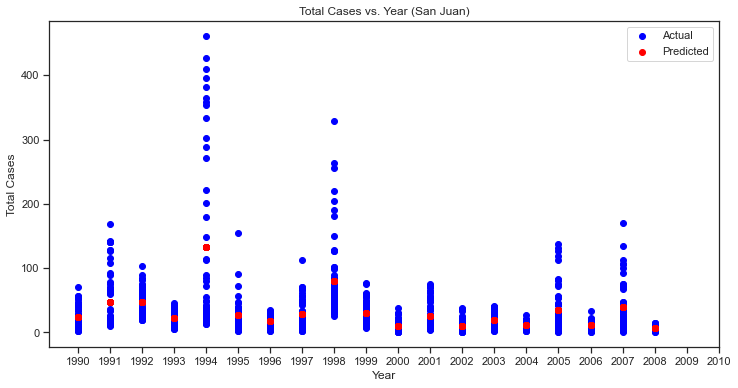

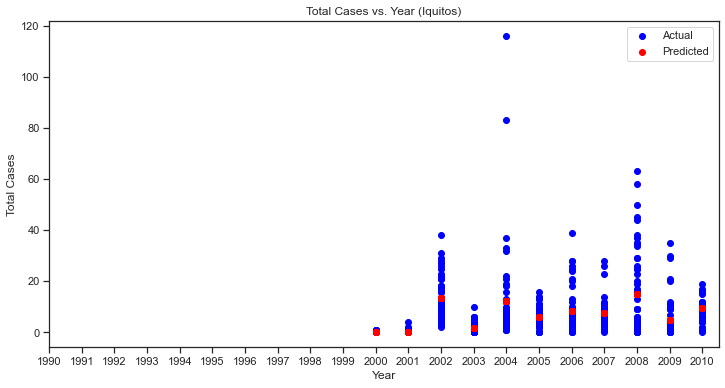

In [287]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the range of years for plotting
years = np.arange(df['year'].min(), df['year'].max() + 1)

# Generate predictions for each city
y_sj_pred_all = model_sj.predict(X[df_encoded['city_sj'] == 1])
y_iq_pred_all = model_iq.predict(X[df_encoded['city_iq'] == 1])

# Scatter plot for San Juan
plt.figure(figsize=(12, 6))
plt.scatter(df[df['city'] == 'sj']['year'], df[df['city'] == 'sj']['total_cases'], color='blue', label='Actual')
plt.scatter(df[df['city'] == 'sj']['year'], y_sj_pred_all, color='red', label='Predicted')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (San Juan)')
plt.legend()
plt.show()

# Scatter plot for Iquitos
plt.figure(figsize=(12, 6))
plt.scatter(df[df['city'] == 'iq']['year'], df[df['city'] == 'iq']['total_cases'], color='blue', label='Actual')
plt.scatter(df[df['city'] == 'iq']['year'], y_iq_pred_all, color='red', label='Predicted')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (Iquitos)')
plt.legend()
plt.show()


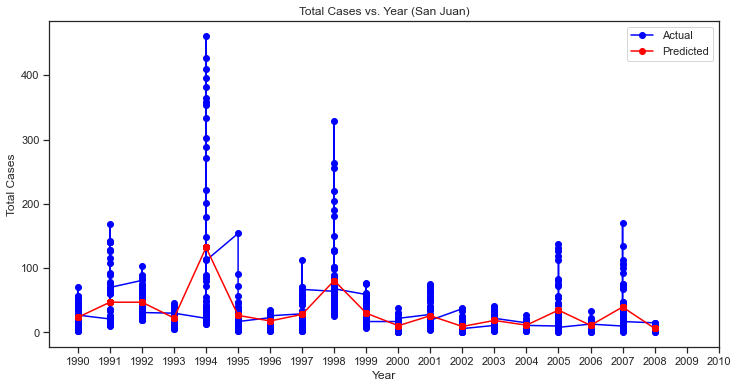

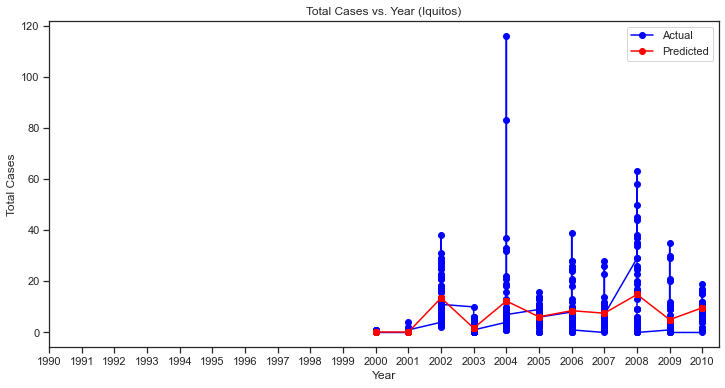

In [288]:
# Line plot with markers for San Juan
plt.figure(figsize=(12, 6))
plt.plot(df[df['city'] == 'sj']['year'], df[df['city'] == 'sj']['total_cases'], marker='o', color='blue', label='Actual')
plt.plot(df[df['city'] == 'sj']['year'], y_sj_pred_all, marker='o', color='red', label='Predicted')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (San Juan)')
plt.legend()
plt.show()

# Line plot with markers for Iquitos
plt.figure(figsize=(12, 6))
plt.plot(df[df['city'] == 'iq']['year'], df[df['city'] == 'iq']['total_cases'], marker='o', color='blue', label='Actual')
plt.plot(df[df['city'] == 'iq']['year'], y_iq_pred_all, marker='o', color='red', label='Predicted')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (Iquitos)')
plt.legend()
plt.show()

In [272]:
#Support vector model being used for prediction

In [273]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Read the dataset
df = pd.read_csv('dengue_labels_train.csv')

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year']
df_selected = df[columns_of_interest]

# Split the data into San Juan (sj) and Iquitos (iq)
df_sj = df_selected[df_selected['city'] == 'sj']
df_iq = df_selected[df_selected['city'] == 'iq']

# Encode the categorical variable 'city' using one-hot encoding
df_sj_encoded = pd.get_dummies(df_sj, columns=['city'])
df_iq_encoded = pd.get_dummies(df_iq, columns=['city'])

# Split the data into features and labels for San Juan (sj)
X_sj = df_sj_encoded.drop('total_cases', axis=1)
y_sj = df_sj_encoded['total_cases']
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X_sj, y_sj, test_size=0.2, random_state=42)

# Split the data into features and labels for Iquitos (iq)
X_iq = df_iq_encoded.drop('total_cases', axis=1)
y_iq = df_iq_encoded['total_cases']
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X_iq, y_iq, test_size=0.2, random_state=42)

# Create and fit the SVM models for each city
model_sj = SVR()
model_sj.fit(X_sj_train, y_sj_train)

model_iq = SVR()
model_iq.fit(X_iq_train, y_iq_train)

# Make predictions on the test sets for each city
y_sj_pred = model_sj.predict(X_sj_test)
y_iq_pred = model_iq.predict(X_iq_test)

# Calculate mean absolute error for each city
mae_sj = mean_absolute_error(y_sj_test, y_sj_pred)
mae_iq = mean_absolute_error(y_iq_test, y_iq_pred)

print("Mean Absolute Error (San Juan):", mae_sj)
print("Mean Absolute Error (Iquitos):", mae_iq)





Mean Absolute Error (San Juan): 24.896614768085907
Mean Absolute Error (Iquitos): 5.453640002741166


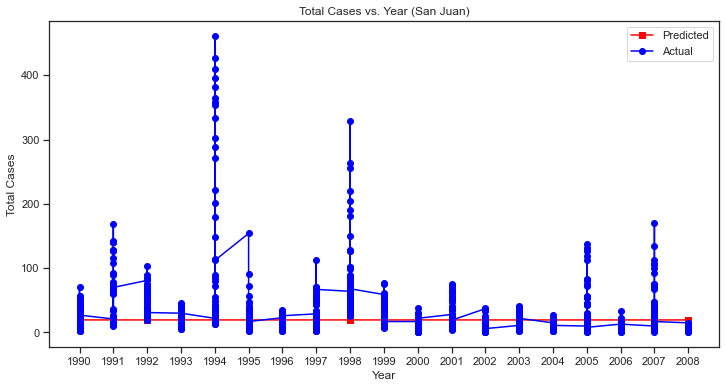

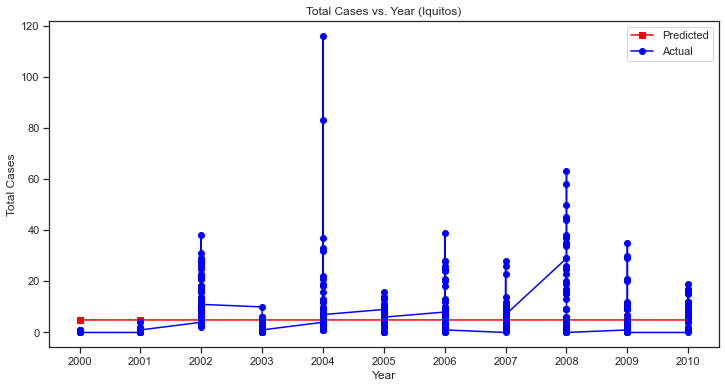

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Create arrays for the years
years_sj = np.arange(df_sj['year'].min(), df_sj['year'].max() + 1)
years_iq = np.arange(df_iq['year'].min(), df_iq['year'].max() + 1)

# Generate predictions for each city
y_sj_pred_all = model_sj.predict(X_sj)
y_iq_pred_all = model_iq.predict(X_iq)

# Line graph for San Juan
plt.figure(figsize=(12, 6))
plt.plot(df_sj['year'], y_sj_pred_all, color='red', marker='s', label='Predicted')
plt.plot(df_sj['year'], df_sj['total_cases'], color='blue', marker='o', label='Actual')
plt.xticks(years_sj)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (San Juan)')
plt.legend()
plt.show()

# Line graph for Iquitos
plt.figure(figsize=(12, 6))
plt.plot(df_iq['year'], y_iq_pred_all, color='red', marker='s', label='Predicted')
plt.plot(df_iq['year'], df_iq['total_cases'], color='blue', marker='o', label='Actual')
plt.xticks(years_iq)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (Iquitos)')
plt.legend()
plt.show()





In [275]:
#so as we can see that in multiple linear regression model we are getting
#Mean Absolute Error (San Juan): 27.7363015276809
#Mean Absolute Error (Iquitos): 5.862783768886453

#whereas in So for random forest I am getting 
#Mean Absolute Error (San Juan): 23.70109125613919
#Mean Absolute Error (Iquitos): 4.6363308633518425

#And for SVM I am getting 
#Mean Absolute Error (San Juan):.896614768085907
#Mean Absolute Error (Iquitos): 5.453640002741166

#the Random Forest achieves lower MAE values compared to the other two model for San Juan. 
#This suggests that the random forest model performs better in predicting the total number of dengue cases.


In [276]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Read the label data from the CSV file
labels_df = pd.read_csv('dengue_labels_train.csv')

# Read the features data from the CSV file
features_df = pd.read_csv('dengue_features_train.csv')

# Merge the two dataframes based on 'city' and 'year'
df_merged = pd.merge(features_df, labels_df, on=['city', 'year'])

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
                       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 
                       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 
                       'station_diur_temp_rng_c', 'station_min_temp_c']
df_selected = df_merged[columns_of_interest]

# Perform one-hot encoding for the 'city' column
df_encoded = pd.get_dummies(df_selected, columns=['city'])

# Drop rows with missing values
df_encoded.dropna(inplace=True)

# Split the data into features and labels
X = df_encoded.drop('total_cases', axis=1)
y = df_encoded['total_cases']

# Split the data into training and test sets for each city
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X[df_encoded['city_sj'] == 1], y[df_encoded['city_sj'] == 1], test_size=0.2, random_state=42)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X[df_encoded['city_iq'] == 1], y[df_encoded['city_iq'] == 1], test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_sj_train_scaled = scaler.fit_transform(X_sj_train)
X_sj_test_scaled = scaler.transform(X_sj_test)

X_iq_train_scaled = scaler.fit_transform(X_iq_train)
X_iq_test_scaled = scaler.transform(X_iq_test)

# Create and fit the Random Forest Regression models for each city
model_sj = RandomForestRegressor()
model_sj.fit(X_sj_train_scaled, y_sj_train)

model_iq = RandomForestRegressor()
model_iq.fit(X_iq_train_scaled, y_iq_train)

# Make predictions on the test sets for each city
y_sj_pred = model_sj.predict(X_sj_test_scaled)
y_iq_pred = model_iq.predict(X_iq_test_scaled)

# Calculate mean absolute error for each city
mae_sj = mean_absolute_error(y_sj_test, y_sj_pred)
mae_iq = mean_absolute_error(y_iq_test, y_iq_pred)

print("Mean Absolute Error (San Juan):", mae_sj)
print("Mean Absolute Error (Iquitos):", mae_iq)

Mean Absolute Error (San Juan): 22.554038189142283
Mean Absolute Error (Iquitos): 5.646779465210032


In [277]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read the label data from the CSV file
labels_df = pd.read_csv('dengue_labels_train.csv')

# Read the features data from the CSV file
features_df = pd.read_csv('dengue_features_train.csv')

# Merge the two dataframes based on 'city' and 'year'
df_merged = pd.merge(features_df, labels_df, on=['city', 'year'])

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
                       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 
                       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 
                       'station_diur_temp_rng_c', 'station_min_temp_c']
df_selected = df_merged[columns_of_interest]

# Perform one-hot encoding for the 'city' column
df_encoded = pd.get_dummies(df_selected, columns=['city'])

# Drop rows with missing values
df_encoded.dropna(inplace=True)

# Split the data into features and labels
X = df_encoded.drop('total_cases', axis=1)
y = df_encoded['total_cases']

# Split the data into training and test sets for each city
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X[df_encoded['city_sj'] == 1],
                                                                y[df_encoded['city_sj'] == 1],
                                                                test_size=0.2, random_state=42)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X[df_encoded['city_iq'] == 1],
                                                                y[df_encoded['city_iq'] == 1],
                                                                test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_sj_train_scaled = scaler.fit_transform(X_sj_train)
X_sj_test_scaled = scaler.transform(X_sj_test)

X_iq_train_scaled = scaler.fit_transform(X_iq_train)
X_iq_test_scaled = scaler.transform(X_iq_test)

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=18)
X_sj_train_scaled_pca = pca.fit_transform(X_sj_train_scaled)
X_sj_test_scaled_pca = pca.transform(X_sj_test_scaled)

X_iq_train_scaled_pca = pca.fit_transform(X_iq_train_scaled)
X_iq_test_scaled_pca = pca.transform(X_iq_test_scaled)

# Create and fit the Random Forest Regression models for each city
model_sj = RandomForestRegressor()
model_sj.fit(X_sj_train_scaled_pca, y_sj_train)

model_iq = RandomForestRegressor()
model_iq.fit(X_iq_train_scaled_pca, y_iq_train)

# Make predictions on the test sets for each city
y_sj_pred = model_sj.predict(X_sj_test_scaled_pca)
y_iq_pred = model_iq.predict(X_iq_test_scaled_pca)

# Calculate mean absolute error for each city
mae_sj = mean_absolute_error(y_sj_test, y_sj_pred)
mae_iq = mean_absolute_error(y_iq_test, y_iq_pred)

print("Mean Absolute Error (San Juan):", mae_sj)
print("Mean Absolute Error (Iquitos):", mae_iq)

Mean Absolute Error (San Juan): 22.557200177258537
Mean Absolute Error (Iquitos): 5.646832065935282


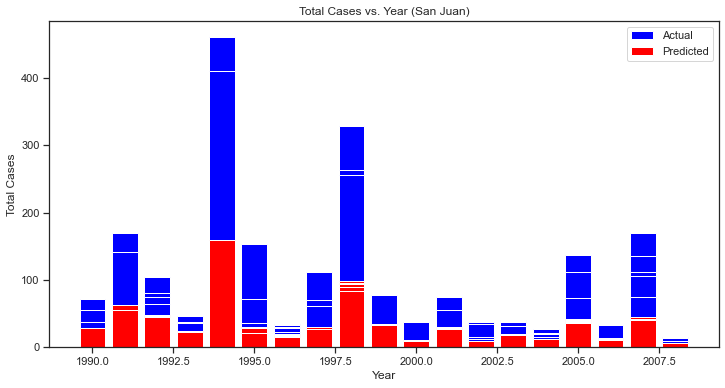

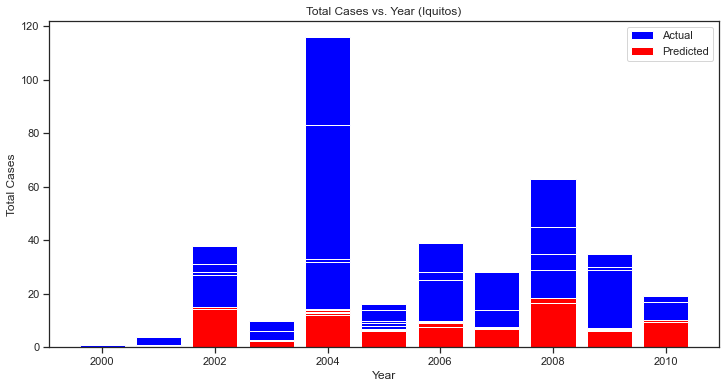

In [278]:
import matplotlib.pyplot as plt

# Bar chart for San Juan
plt.figure(figsize=(12, 6))
plt.bar(X_sj_test['year'], y_sj_test, color='blue', label='Actual')
plt.bar(X_sj_test['year'], y_sj_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (San Juan)')
plt.legend()
plt.show()

# Bar chart for Iquitos
plt.figure(figsize=(12, 6))
plt.bar(X_iq_test['year'], y_iq_test, color='blue', label='Actual')
plt.bar(X_iq_test['year'], y_iq_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year (Iquitos)')
plt.legend()
plt.show()


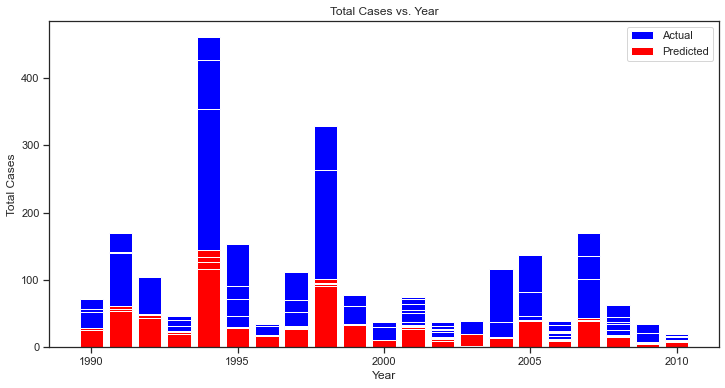

Mean Absolute Error: 15.862444584134824


In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read the label data from the CSV file
labels_df = pd.read_csv('dengue_labels_train.csv')

# Read the features data from the CSV file
features_df = pd.read_csv('dengue_features_train.csv')

# Merge the two dataframes based on 'city' and 'year'
df_merged = pd.merge(features_df, labels_df, on=['city', 'year'])

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
                       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                       'reanalysis_relative_humidity_percent',
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
                       'station_diur_temp_rng_c', 'station_min_temp_c']
df_selected = df_merged[columns_of_interest]

# Perform one-hot encoding for the 'city' column
df_encoded = pd.get_dummies(df_selected, columns=['city'])

# Drop rows with missing values
df_encoded.dropna(inplace=True)

# Split the data into features and labels
X = df_encoded.drop('total_cases', axis=1)
y = df_encoded['total_cases']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=18)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# Create and fit the Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train_scaled_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_pca)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Get the original 'year' values for visualization
years_test = df_selected['year'].values[X_test.index]

# Bar chart for Total Cases vs. Year
plt.figure(figsize=(12, 6))
plt.bar(years_test, y_test, color='blue', label='Actual')
plt.bar(years_test, y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Total Cases vs. Year')
plt.legend()
plt.show()

print("Mean Absolute Error:", mae)



In [280]:
#Adding GridSearchCV for finding the best hyperparameters

In [281]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read the label data from the CSV file
labels_df = pd.read_csv('dengue_labels_train.csv')

# Read the features data from the CSV file
features_df = pd.read_csv('dengue_features_train.csv')

# Merge the two dataframes based on 'city' and 'year'
df_merged = pd.merge(features_df, labels_df, on=['city', 'year'])

# Select the columns of interest
columns_of_interest = ['city', 'total_cases', 'year', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
                       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 
                       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 
                       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 
                       'station_diur_temp_rng_c', 'station_min_temp_c']
df_selected = df_merged[columns_of_interest]

# Perform one-hot encoding for the 'city' column
df_encoded = pd.get_dummies(df_selected, columns=['city'])

# Drop rows with missing values
df_encoded.dropna(inplace=True)

# Split the data into features and labels
X = df_encoded.drop('total_cases', axis=1)
y = df_encoded['total_cases']

# Split the data into training and test sets for each city
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X[df_encoded['city_sj'] == 1],
                                                                y[df_encoded['city_sj'] == 1],
                                                                test_size=0.2, random_state=42)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X[df_encoded['city_iq'] == 1],
                                                                y[df_encoded['city_iq'] == 1],
                                                                test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_sj_train_scaled = scaler.fit_transform(X_sj_train)
X_sj_test_scaled = scaler.transform(X_sj_test)

X_iq_train_scaled = scaler.fit_transform(X_iq_train)
X_iq_test_scaled = scaler.transform(X_iq_test)

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=18)
X_sj_train_scaled_pca = pca.fit_transform(X_sj_train_scaled)
X_sj_test_scaled_pca = pca.transform(X_sj_test_scaled)

X_iq_train_scaled_pca = pca.fit_transform(X_iq_train_scaled)
X_iq_test_scaled_pca = pca.transform(X_iq_test_scaled)

# Create GridSearchCV objects for each city's model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_sj = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_iq = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Fit the models with hyperparameter tuning
grid_search_sj.fit(X_sj_train_scaled_pca, y_sj_train)
grid_search_iq.fit(X_iq_train_scaled_pca, y_iq_train)

# Get the best hyperparameters for each model
best_params_sj = grid_search_sj.best_params_
best_params_iq = grid_search_iq.best_params_

# Create and fit the Random Forest Regression models for each city with the best hyperparameters
model_sj = RandomForestRegressor(**best_params_sj)
model_sj.fit(X_sj_train_scaled_pca, y_sj_train)

model_iq = RandomForestRegressor(**best_params_iq)
model_iq.fit(X_iq_train_scaled_pca, y_iq_train)

# Make predictions on the test sets for each city
y_sj_pred = model_sj.predict(X_sj_test_scaled_pca)
y_iq_pred = model_iq.predict(X_iq_test_scaled_pca)

# Calculate mean absolute error for each city
mae_sj = mean_absolute_error(y_sj_test, y_sj_pred)
mae_iq = mean_absolute_error(y_iq_test, y_iq_pred)

print("Mean Absolute Error (San Juan):", mae_sj)
print("Mean Absolute Error (Iquitos):", mae_iq)


Mean Absolute Error (San Juan): 22.5591155422725
Mean Absolute Error (Iquitos): 5.6348195335106395


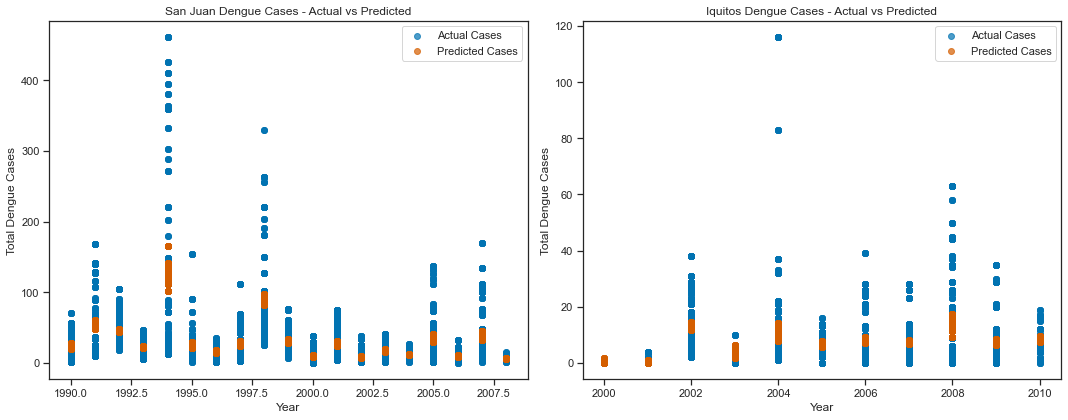

In [282]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# San Juan
sj_years = X_sj_test['year']
ax1.scatter(sj_years, y_sj_test, label='Actual Cases', color='b', alpha=0.7)
ax1.scatter(sj_years, y_sj_pred, label='Predicted Cases', color='r', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Dengue Cases')
ax1.set_title('San Juan Dengue Cases - Actual vs Predicted')
ax1.legend()

# Iquitos
iq_years = X_iq_test['year']
ax2.scatter(iq_years, y_iq_test, label='Actual Cases', color='b', alpha=0.7)
ax2.scatter(iq_years, y_iq_pred, label='Predicted Cases', color='r', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Dengue Cases')
ax2.set_title('Iquitos Dengue Cases - Actual vs Predicted')
ax2.legend()

plt.tight_layout()
plt.show()
